In [161]:
import pandas as pd
import twint
from pytrends.request import TrendReq
pytrends = TrendReq(backoff_factor=0.5)
%run -i 'functions2.py'
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)
import seaborn as sns
import numpy as np
from statsmodels.tsa.stattools import adfuller
sns.set(style="whitegrid", color_codes=True)
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### The time format is in UTC for GT  
Something to think about as you review the trends, and might want to aggregate the different timezones in the US to a central zone... maybe CT.

The score given by the data is actually a relative score that, in order to be used as a metric of popularity, needs to be scaled.

In [40]:
# Some scraped tweets
tweets = pd.read_csv('tweets2.csv')
more_tweets = pd.read_csv('old_tweets.csv')

In [41]:
history = tweets.copy()
history = history[['date', 'tweet']]
more_history = more_tweets.copy()
more_history = more_history[['date','tweet']]

In [10]:
print(history.shape)
print(more_history.shape)


(4820, 2)
(8194, 2)


In [43]:
type(more_history['date'])

str

In [44]:
more_history['date'] = pd.to_datetime(more_history['date'])

In [46]:
more_history['date'][0]

Timestamp('2020-05-13 00:00:00')

In [34]:
history['date'] = pd.to_datetime(history['date'])
more_history['date'] = pd.to_datetime(more_history['date'])

In [47]:
# history['instances']=history.groupby('date').transform('count')
more_history['instances']=more_history.groupby('date').transform('count')

In [17]:
# history = history.loc[~history.index.duplicated(keep='first')]
# more_history = more_history.loc[~more_history.index.duplicated(keep='first')]

In [49]:
type(more_history['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [50]:
more_history.set_index('date', inplace=True)

In [83]:
mon_hist = more_history.resample('M').sum()

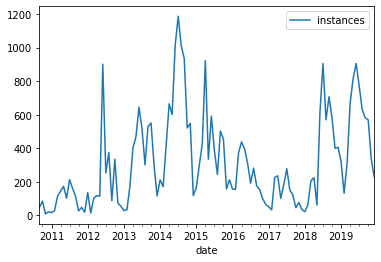

In [89]:
mon_hist[:'2019'].plot()

In [93]:
# When turned into a yearly interval, non-stationarity occurs
# At Q, M, or 
dftest2(mon_hist[:'2019'])

Test Stat                -4.214728
P-Value                   0.000622
# Lags                    0.000000
# Observations          111.000000
Critical Value (1%)      -3.490683
Critical Value (5%)      -2.887952
Critical Value (10%)     -2.580857
dtype: float64

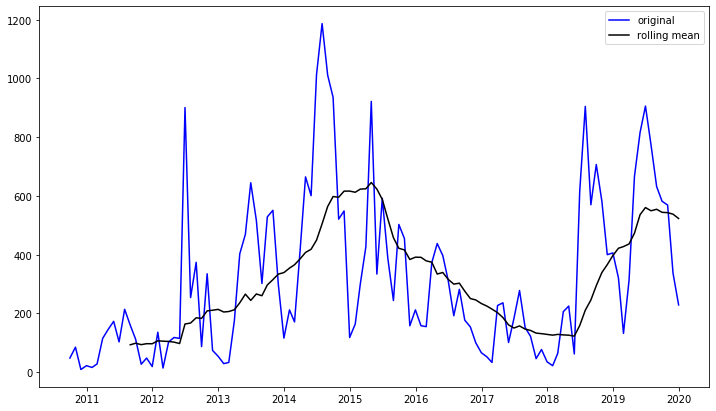

In [95]:
r_mean = mon_hist[:'2019'].rolling(window=12, center=False).mean()
fig = plt.figure(figsize=(12,7))
plt.plot(mon_hist[:'2019'], color='blue',label='original')
plt.plot(r_mean, color='black', label='rolling mean')
plt.legend(loc='best')
plt.show(block=False)

In [61]:
from statsmodels.tsa.stattools import adfuller

In [59]:
def dftest2(data):
    test = adfuller(data['instances'])
    test_output = pd.Series(test[0:4], index=['Test Stat', 'P-Value', '# Lags', '# Observations'])
    for key, value in test[4].items():
        test_output['Critical Value (%s)' %key]=value
    return(test_output)

The data is stationary, not sure what this means for the future of this dataset.  
Going to look into the Google Trends data again now that I have my VPN set up to prevent Google from blocking me.

In [77]:
gt_1520 = pytrends.get_historical_interest(['urban farm'], year_start=2015, geo='US',
                                           year_end=2019, month_end=12)

HTTPSConnectionPool(host='trends.google.com', port=443): Read timed out. (read timeout=5)


In [ ]:
gt_1520 = pytrends.get_historical_interest(['urban farm'], year_start=2015, geo='US',
                                           year_end=2019, month_end=12)

In [78]:
# Captured almost all of the data I wanted
gt_1520

,urban farm,isPartial
date,,
2015-01-01 00:00:00,35,False
2015-01-01 01:00:00,83,False
2015-01-01 02:00:00,38,False
2015-01-01 03:00:00,28,False
2015-01-01 04:00:00,15,False
...,...,...
2019-11-30 20:00:00,45,False
2019-11-30 21:00:00,34,False
2019-11-30 22:00:00,38,False


In [81]:
# Saving this data, looks good
gt_1520.to_csv('gt_1520.csv')

In [79]:
## This failed to run but I can probably change my location on VPN to get it to run
# gt_0914 = pytrends.get_historical_interest(['urban farm'], year_start=2009, geo='US',
#                                            year_end=2014, month_end=12)

The request failed: Google returned a response with code 429.
The request failed: Google returned a response with code 429.
The request failed: Google returned a response with code 429.
The request failed: Google returned a response with code 429.
The request failed: Google returned a response with code 429.
The request failed: Google returned a response with code 429.
The request failed: Google returned a response with code 429.
The request failed: Google returned a response with code 429.
The request failed: Google returned a response with code 429.
The request failed: Google returned a response with code 429.
The request failed: Google returned a response with code 429.
The request failed: Google returned a response with code 429.
The request failed: Google returned a response with code 429.
The request failed: Google returned a response with code 429.
The request failed: Google returned a response with code 429.
The request failed: Google returned a response with code 429.
The requ

The request failed: Google returned a response with code 429.
The request failed: Google returned a response with code 429.
The request failed: Google returned a response with code 429.
The request failed: Google returned a response with code 429.
The request failed: Google returned a response with code 429.
The request failed: Google returned a response with code 429.
The request failed: Google returned a response with code 429.
The request failed: Google returned a response with code 429.
The request failed: Google returned a response with code 429.
The request failed: Google returned a response with code 429.
The request failed: Google returned a response with code 429.
The request failed: Google returned a response with code 429.
The request failed: Google returned a response with code 429.
The request failed: Google returned a response with code 429.
The request failed: Google returned a response with code 429.
The request failed: Google returned a response with code 429.
The requ

In [ ]:
gt_0914 = pytrends.get_historical_interest(['urban farm'], year_start=2009, geo='US',
                                           year_end=2014, month_end=12)

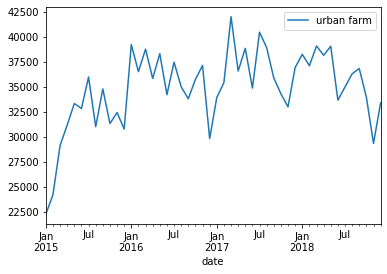

In [112]:
gt_1520['2015':'2018'].resample('M').sum().plot()

In [102]:
def dftest3(data):
    test = adfuller(data['urban farm'])
    test_output = pd.Series(test[0:4], index=['Test Stat', 'P-Value', '# Lags', '# Observations'])
    for key, value in test[4].items():
        test_output['Critical Value (%s)' %key]=value
    return(test_output)

In [111]:
dftest3(gt_1520['2015':'2018'].resample('M').sum())

Test Stat               -2.758549
P-Value                  0.064443
# Lags                   4.000000
# Observations          43.000000
Critical Value (1%)     -3.592504
Critical Value (5%)     -2.931550
Critical Value (10%)    -2.604066
dtype: float64

In [113]:
ind_farm = pd.read_csv('ind_farm.csv')

In [116]:
ind_farm = ind_farm[['date', 'tweet']]
ind_farm['date'] = pd.to_datetime(ind_farm['date'])
ind_farm.set_index('date', inplace=True)

In [117]:
ind_farm

,tweet
date,
2020-05-14,No indoor plumbing yet? Sounds like my Momma’...
2020-05-14,Learn how to grow weed >> http://www.howtogro...
2020-05-13,We have a little flower and pre-rolls left fro...
2020-05-13,"I think once these sit vacant long enough, the..."
2020-05-13,L.E. Huck & Sons Farm Market in Marietta has r...
...,...
2010-10-05,$10 for $20 Worth of Fresh Local Produce and P...
2010-10-05,$10 for $20 Worth of Fresh Local Produce and P...
2010-10-05,$10 for $20 Worth of Fresh Local Produce and P...


In [118]:
ind_farm['instances']=ind_farm.groupby('date').transform('count')

In [119]:
ind_farm

,tweet,instances
date,,
2020-05-14,No indoor plumbing yet? Sounds like my Momma’...,2
2020-05-14,Learn how to grow weed >> http://www.howtogro...,2
2020-05-13,We have a little flower and pre-rolls left fro...,14
2020-05-13,"I think once these sit vacant long enough, the...",14
2020-05-13,L.E. Huck & Sons Farm Market in Marietta has r...,14
...,...,...
2010-10-05,$10 for $20 Worth of Fresh Local Produce and P...,41
2010-10-05,$10 for $20 Worth of Fresh Local Produce and P...,41
2010-10-05,$10 for $20 Worth of Fresh Local Produce and P...,41


In [120]:
ind_farm.drop(columns=['tweet'], axis=1, inplace=True)

In [121]:
ind_farm = ind_farm.loc[~ind_farm.index.duplicated(keep='first')]

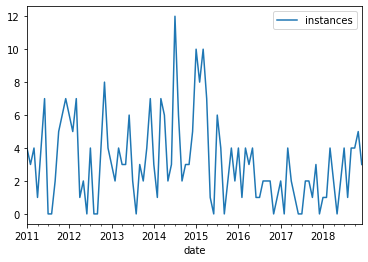

In [141]:
ind_farm['2018':'2011'].resample('M').sum().plot()

In [136]:
ind_farm['2017']

,instances
date,
2017-11-29,1
2017-11-18,1
2017-11-12,1
2017-10-21,1
2017-09-30,2
2017-08-25,1
2017-08-10,1
2017-05-27,1
2017-04-27,1


In [126]:
dftest2(ind_farm.resample('W').sum())

Test Stat                 1.708256
P-Value                   0.998149
# Lags                   14.000000
# Observations          489.000000
Critical Value (1%)      -3.443794
Critical Value (5%)      -2.867469
Critical Value (10%)     -2.569928
dtype: float64

In [137]:
vert_farms = pd.read_csv('vert_farm.csv')

In [142]:
urfa = pd.read_csv('urfa.csv')

In [146]:
urfa = process_tweets(urfa)

functions2.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data['date'])
functions2.py:188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['instances']=data.groupby('date').transform('count')
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

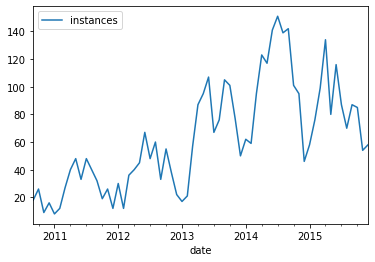

In [156]:
urfa['2015':'2010'].resample('M').sum().plot()

In [157]:
dftest2(urfa['2015':'2010'].resample('W').sum())

Test Stat                -2.422020
P-Value                   0.135618
# Lags                   12.000000
# Observations          265.000000
Critical Value (1%)      -3.455270
Critical Value (5%)      -2.872509
Critical Value (10%)     -2.572615
dtype: float64

(<Figure size 1152x216 with 1 Axes>, <Figure size 1152x216 with 1 Axes>)

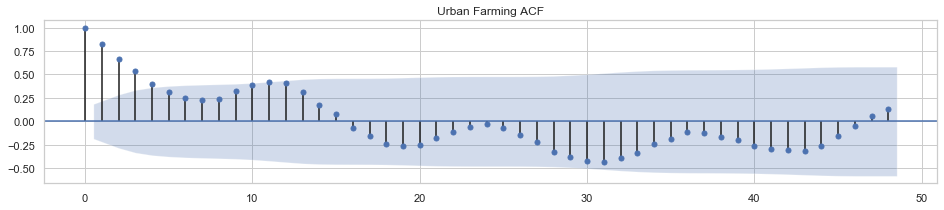

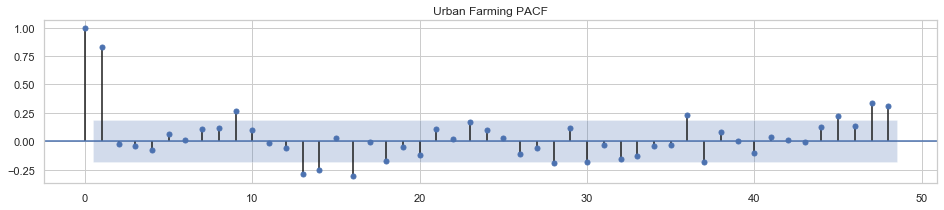

In [163]:
auto_corrs(urfa.resample('M').sum(), 'Urban Farming')